In [856]:
#Data Cleaning to check if there are any NAN, duplicates or any wrong values.

In [1109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression 

In [1106]:
#the supplied CSV data file is the raw_data directory
data=pd.read_csv('/Users/sidrakamal/Desktop/archive/CO2 Emissions_Canada.csv')
#Call the info method on C02_data to see a summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [1107]:
data.shape

(7385, 12)

In [1108]:
#Call the head method on C02_data to print the first several rows of the data
data.head(5)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [861]:
#removing the Fuel Consumption Comb column because it is not needed
data.drop(columns='Fuel Consumption Comb (mpg)',inplace=True)
data.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [862]:
#Removing inconsistent categories from Make, Model, Vehicle Class, Transmission and Fuel Type

In [863]:
# Create a dictionary which will remap the values and replace the abbreviation in Fuel Type

dict = {'Z' : 'Premium gasoline', 'D' : 'Diesel', 'E' : 'Ethanol', 'N' : 'Natural gas','X': 'Regular gasoline'}
  
# Print the dictionary
print(dict)
  
# Remap the values of the dataframe
data=data.replace({"Fuel Type": dict})
data.head(5)


{'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'Ethanol', 'N': 'Natural gas', 'X': 'Regular gasoline'}


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Premium gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Premium gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Premium gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Premium gasoline,12.1,8.7,10.6,244


In [864]:
s=data['Transmission'].value_counts().sort_values(ascending=False)
s

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

In [865]:
#Make all the string data upper case so as to remove the duplicates
data['Make'] = data['Make'].str.upper()
data['Model'] = data['Model'].str.upper()
data['Vehicle Class'] = data['Vehicle Class'].str.upper()
data['Transmission'] = data['Transmission'].str.upper()
data['Fuel Type']=data['Fuel Type'].str.upper()
data.tail(5)



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,PREMIUM GASOLINE,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,PREMIUM GASOLINE,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,PREMIUM GASOLINE,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,PREMIUM GASOLINE,11.2,8.3,9.9,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,PREMIUM GASOLINE,12.2,8.7,10.7,248


In [1104]:
#function for converting the different transmission types to either automatic or manual
def transmission(row):
    x=''
    if row.startswith('A'):
        x='Automatic'
    else:
        x='Manual'
    return x    

In [867]:
#applying the function to the transmission column
data['Transmission'].apply(transmission)

0       Automatic
1          Manual
2       Automatic
3       Automatic
4       Automatic
          ...    
7380    Automatic
7381    Automatic
7382    Automatic
7383    Automatic
7384    Automatic
Name: Transmission, Length: 7385, dtype: object

In [868]:
#renaming the column
data['Transmission_Type']=data['Transmission'].apply(transmission)

In [869]:
#checking the column names in the dataframe
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)', 'Transmission_Type'],
      dtype='object')

In [870]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#C02_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count')

,count,%
Make,0,0.0
Model,0,0.0
Vehicle Class,0,0.0
Engine Size(L),0,0.0
Cylinders,0,0.0
Transmission,0,0.0
Fuel Type,0,0.0
Fuel Consumption City (L/100 km),0,0.0
Fuel Consumption Hwy (L/100 km),0,0.0
Fuel Consumption Comb (L/100 km),0,0.0


In [871]:
# shift column 'Name' to first position
column_ = data.pop('Transmission_Type')
  
# insert column using insert(position,column_name,
# first_column) function
data.insert(6, 'Transmission_Type', column_)
data.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,PREMIUM GASOLINE,9.9,6.7,8.5,196


In [872]:
#number of unique data values in each column
data.nunique()

Make                                  42
Model                               1596
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Transmission_Type                      2
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
CO2 Emissions(g/km)                  331
dtype: int64

In [873]:
#Categorical data
types=data.select_dtypes(include='object')
types

,Make,Model,Vehicle Class,Transmission,Transmission_Type,Fuel Type
0,ACURA,ILX,COMPACT,AS5,Automatic,PREMIUM GASOLINE
1,ACURA,ILX,COMPACT,M6,Manual,PREMIUM GASOLINE
2,ACURA,ILX HYBRID,COMPACT,AV7,Automatic,PREMIUM GASOLINE
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Automatic,PREMIUM GASOLINE
4,ACURA,RDX AWD,SUV - SMALL,AS6,Automatic,PREMIUM GASOLINE
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Automatic,PREMIUM GASOLINE
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Automatic,PREMIUM GASOLINE


In [874]:
#To check for the duplicated rows in the dataframe
duplicate=data.duplicated().sum()
duplicate

1394

In [875]:
#removing the duplicate values from the dataframe
df=data.drop_duplicates()
#finding out the rows and columns after the removal of the duplicates
df.shape

(5991, 12)

In [876]:
#Generate descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5991.0,3.173043,1.365751,0.9,2.0,3.0,3.8,8.4
Cylinders,5991.0,5.633784,1.851161,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),5991.0,12.650075,3.560977,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),5991.0,9.091320,2.293336,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),5991.0,11.049224,2.957762,4.1,8.9,10.6,12.7,26.1
CO2 Emissions(g/km),5991.0,251.638124,59.246929,96.0,208.0,246.0,290.0,522.0


From this table we can see that an average car consumes more fuel in the City than in the Highway!

In [877]:
df['Make'].value_counts(normalize=True)

FORD             0.093974
CHEVROLET        0.083959
BMW              0.082123
MERCEDES-BENZ    0.060591
GMC              0.046403
AUDI             0.043899
PORSCHE          0.042898
TOYOTA           0.042063
NISSAN           0.032048
JEEP             0.031380
MINI             0.031213
KIA              0.030379
VOLKSWAGEN       0.030045
HYUNDAI          0.028710
DODGE            0.025204
HONDA            0.024036
CADILLAC         0.023535
LEXUS            0.021532
MAZDA            0.020865
VOLVO            0.019696
SUBARU           0.018695
JAGUAR           0.017026
BUICK            0.015189
INFINITI         0.014355
LINCOLN          0.013020
LAND ROVER       0.012185
RAM              0.011851
MITSUBISHI       0.011851
CHRYSLER         0.010349
FIAT             0.009014
ACURA            0.008179
MASERATI         0.008179
ROLLS-ROYCE      0.007344
ASTON MARTIN     0.006510
LAMBORGHINI      0.006176
BENTLEY          0.005842
SCION            0.003505
GENESIS          0.002337
ALFA ROMEO  

In [878]:
df['Make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [879]:
df['Model'].value_counts().sort_values(ascending=False).head(10)

MUSTANG          33
F-150 FFV        32
F-150 FFV 4X4    31
SIERRA 4WD       27
SILVERADO 4WD    26
FOCUS FFV        24
SIERRA           24
SILVERADO        24
CAMARO           22
COROLLA          21
Name: Model, dtype: int64

In [880]:
df['Vehicle Class'].value_counts().sort_values(ascending=False).head()

SUV - SMALL       961
MID-SIZE          931
COMPACT           888
SUV - STANDARD    590
SUBCOMPACT        517
Name: Vehicle Class, dtype: int64

In [881]:
df['Engine Size(L)'].value_counts().sort_values(ascending=False).head()

2.0    1212
3.0     641
3.5     409
3.6     403
2.5     338
Name: Engine Size(L), dtype: int64

In [882]:
df['Cylinders'].value_counts().sort_values(ascending=False).head()

4     2612
6     1931
8     1170
12     131
3       80
Name: Cylinders, dtype: int64

In [883]:
df['Transmission'].value_counts().sort_values(ascending=False)

AS6     1103
AS8     1019
M6       724
A6       671
AM7      357
A8       350
AS7      278
A9       250
AV       224
M5       165
AS10     149
AM6       97
AV6       83
AV7       83
A5        72
M7        66
AS9       60
A4        58
AM8       42
A7        42
AV8       33
A10       25
AS5       24
AV10       9
AM5        4
AS4        2
AM9        1
Name: Transmission, dtype: int64

In [884]:
df['Fuel Type'].value_counts().sort_values(ascending=False).head()

REGULAR GASOLINE    2878
PREMIUM GASOLINE    2641
ETHANOL              325
DIESEL               146
NATURAL GAS            1
Name: Fuel Type, dtype: int64

In [885]:
df['Make'].value_counts().sort_values(ascending=False).head()

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

In [886]:
df['Transmission_Type'].value_counts()

Automatic    5036
Manual        955
Name: Transmission_Type, dtype: int64

In [887]:
model=df['Make'].value_counts().sort_values(ascending=False).head(5)
model

FORD             563
CHEVROLET        503
BMW              492
MERCEDES-BENZ    363
GMC              278
Name: Make, dtype: int64

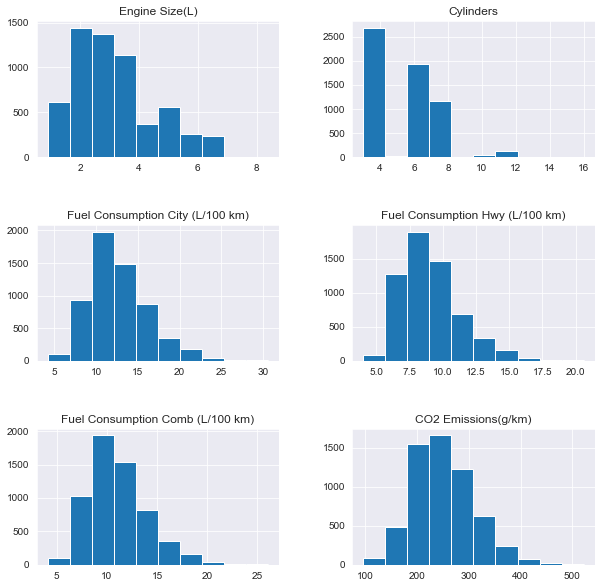

In [888]:
#histogram to check the distribution of the data
df.hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5);

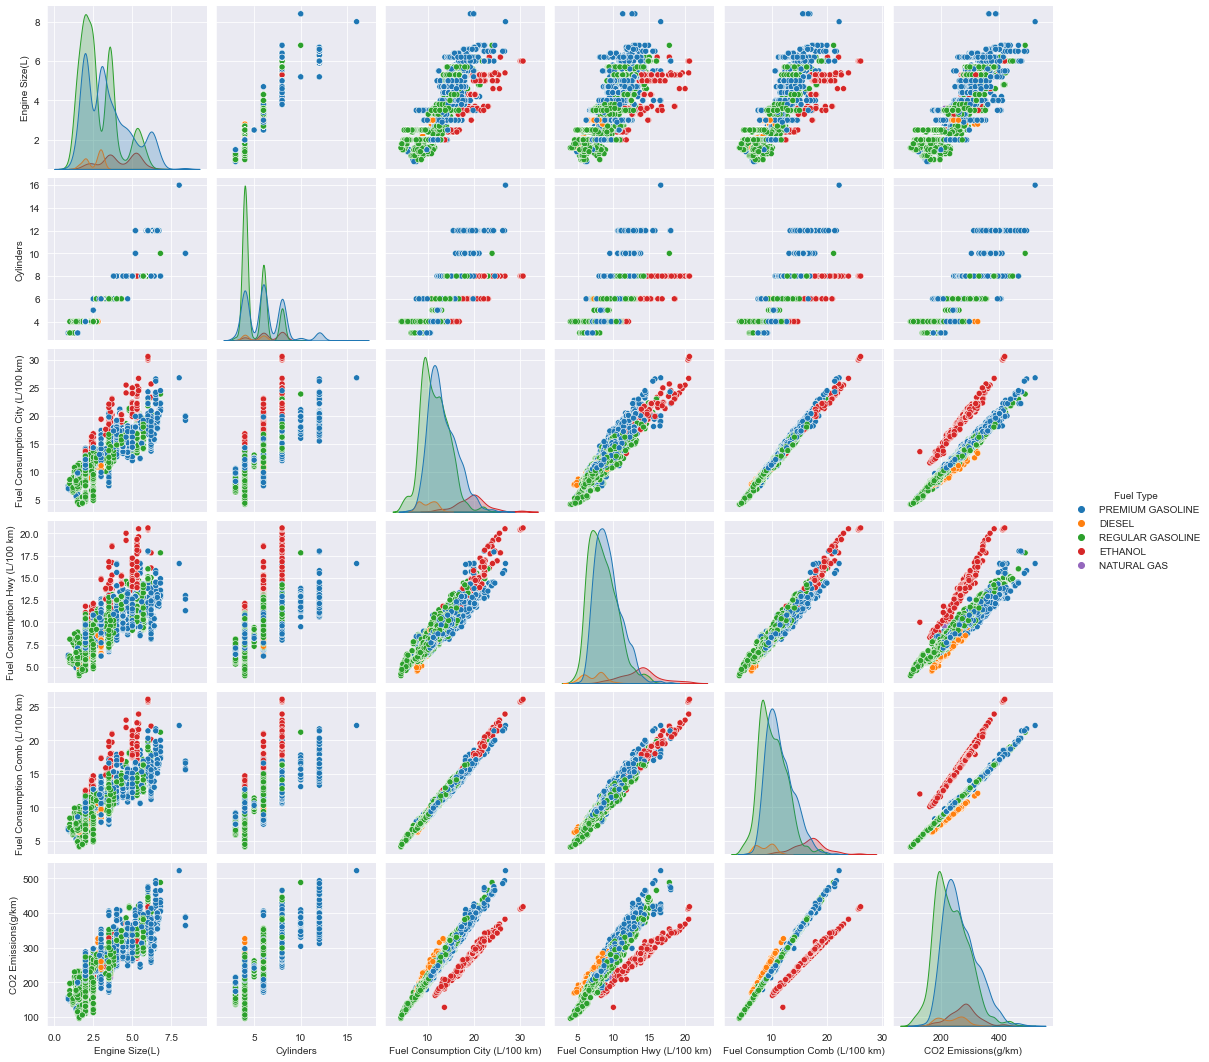

In [889]:
#pairplot to check the relation between two variables
sns.pairplot(df,hue='Fuel Type')

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

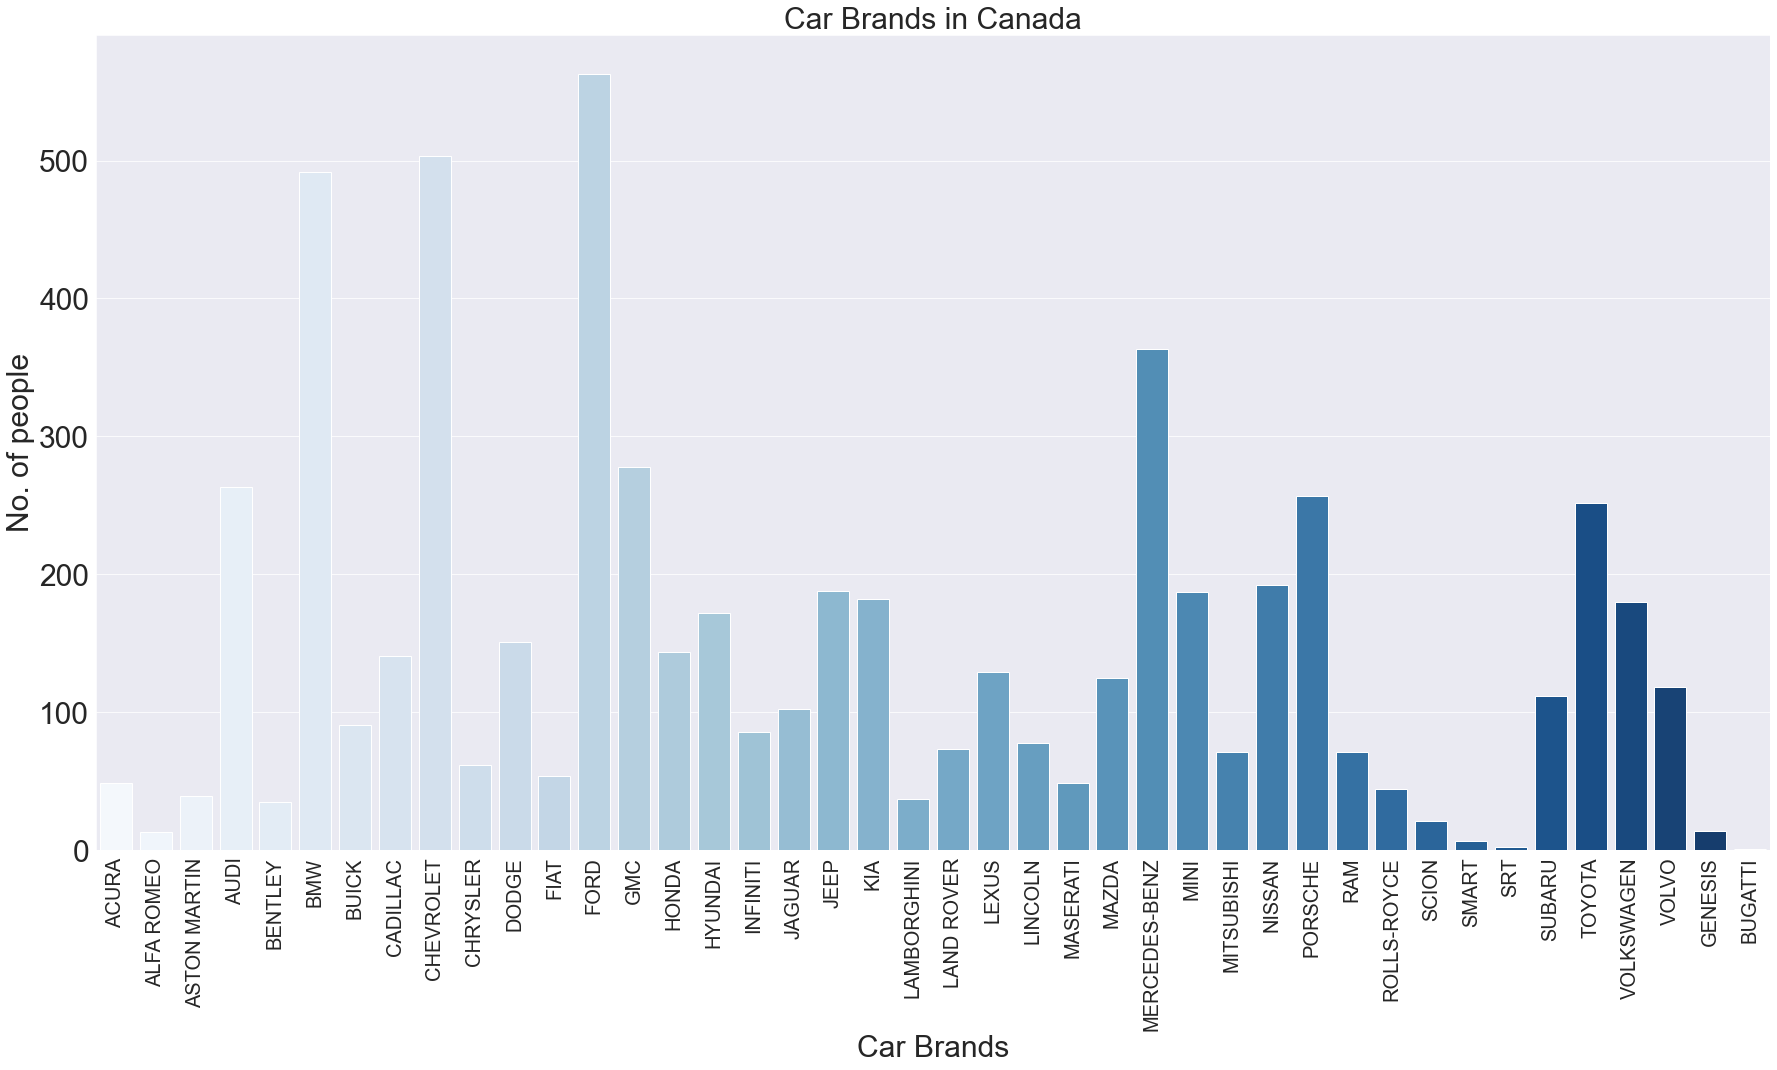

In [890]:
#bar graph for the car brands used in canada
fig, c = plt.subplots(figsize = (30,15))
c = sns.countplot(x = 'Make',data=df,palette='Blues')
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('No. of people', fontsize = 30)
c.set_title('Car Brands in Canada',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30)

From this bar graph, Ford is the most popular choice in Canada.

In [891]:
#grouping the data by make and model
most_fuel_means = df.groupby(['Make','Model'])[['CO2 Emissions(g/km)']].mean()
CO2_emissions=most_fuel_means.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
CO2_emissions

CO2 Emissions(g/km)
Make          Model                                         
BUGATTI       CHIRON                                   522.0
FORD          E350 WAGON                               488.0
MERCEDES-BENZ AMG G 65                                 472.0
LAMBORGHINI   AVENTADOR S ROADSTER                     464.0
              AVENTADOR ROADSTER LP 740                461.0

From this table, car company 'BUGATI' and model CHIRON has the highest fuel consumption in the city with an average of 26.8 L/100 km.



In [892]:
#Looking at Ford Models specifically since it is the most popular company for cars used in Canada
#Which Ford Model consumes the most fuel and is also producing the highest CO2 emissions?
ford=df[df.Make == 'FORD']
ford.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
351,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,Automatic,ETHANOL,26.7,20.5,23.9,382
348,FORD,E150 WAGON FFV,VAN - PASSENGER,4.6,8,A4,Automatic,ETHANOL,25.5,20.0,23.0,368
346,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,Automatic,ETHANOL,24.9,19.6,22.5,360
362,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,Automatic,ETHANOL,24.5,18.0,21.6,346
344,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,Automatic,ETHANOL,24.1,19.2,21.9,350


From this table, Ford Model "E350 WAGON FFV" consumes the most fuel in the city with an average fuel consumption of 26.7(L/100 km)

In [893]:
df_ford_model=ford["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'}).head(10)
df_ford_model



,Model,Count
0,MUSTANG,33
1,F-150 FFV,32
2,F-150 FFV 4X4,31
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,EDGE AWD,17
7,MUSTANG CONVERTIBLE,17
8,FUSION,15
9,ESCAPE AWD,12


Most popular Ford Model is Mustang in Canada

In [894]:
grouped_df = df.groupby(['Make']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max', 'median']})
grouped_df.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max', 'CO2 Emissions_median']
grouped_df = grouped_df.reset_index()
grouped_df.head(5)

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median
0,ACURA,222.428571,136,267,228.0
1,ALFA ROMEO,236.384615,193,292,218.0
2,ASTON MARTIN,344.282051,264,450,345.0
3,AUDI,252.676806,177,409,242.0
4,BENTLEY,367.914286,291,465,373.0


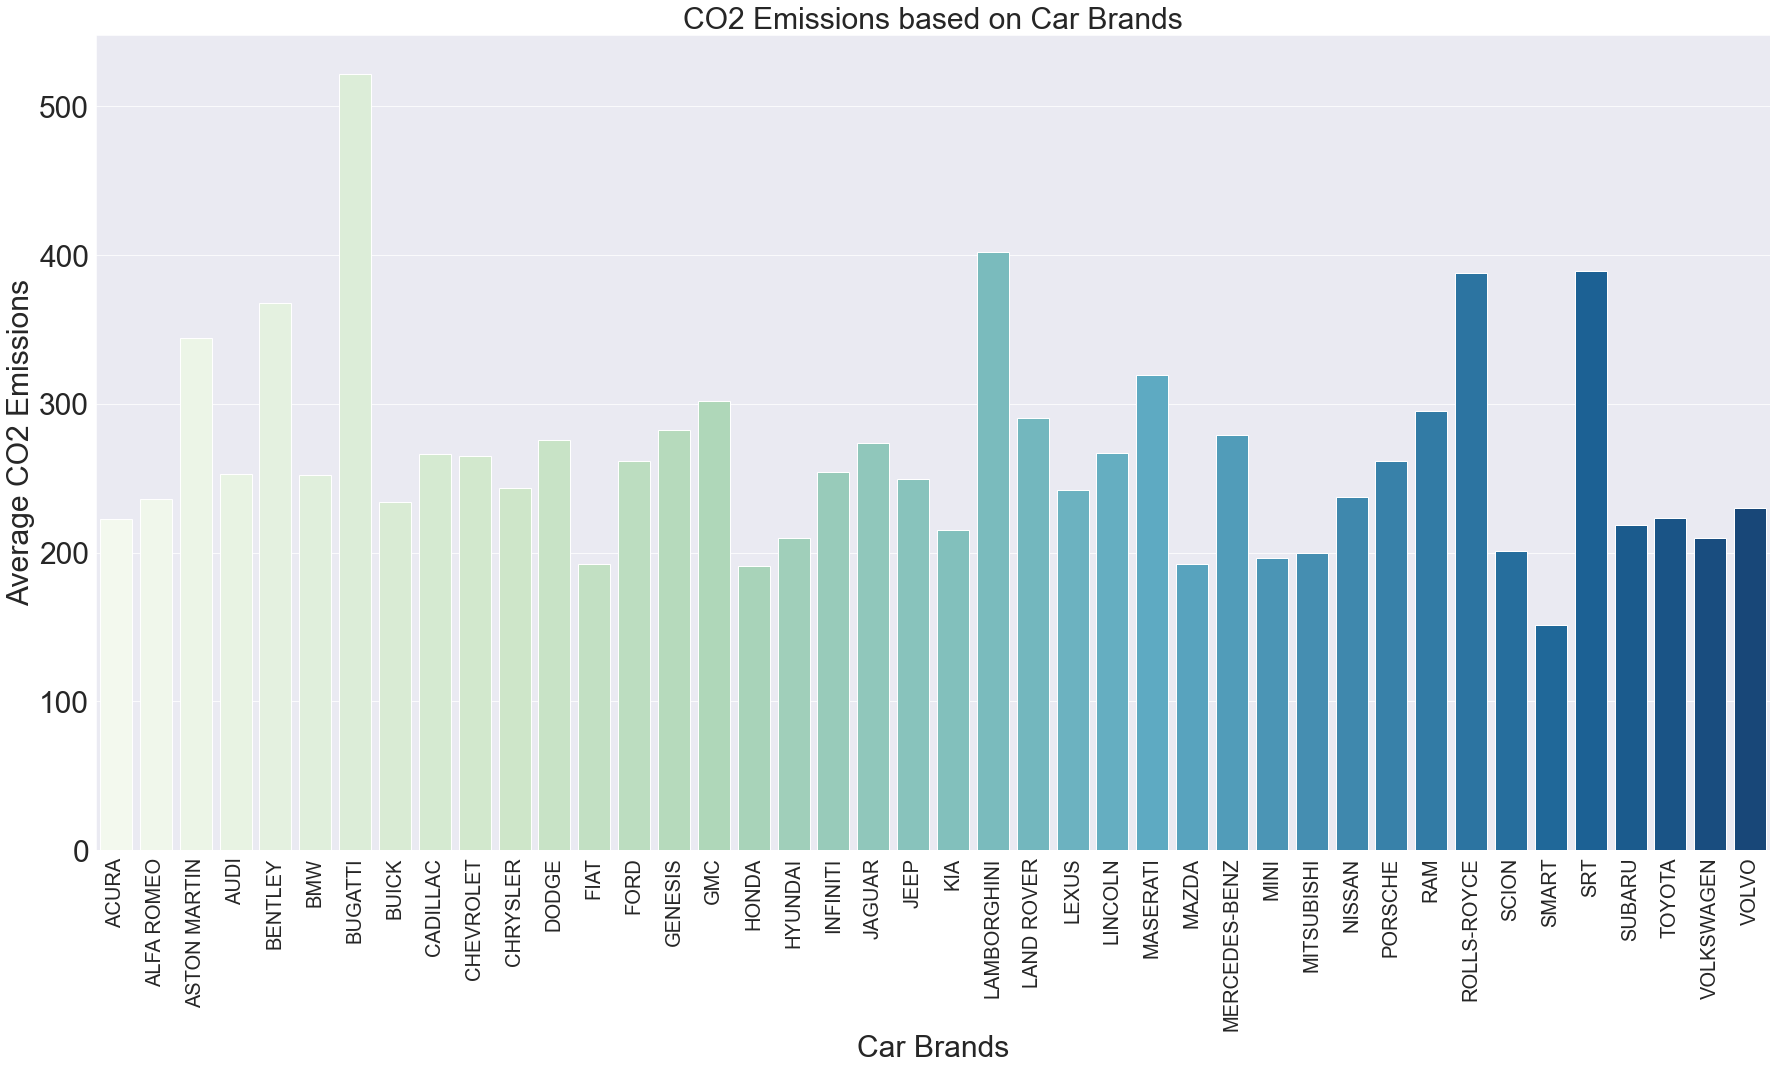

In [895]:
fig, c = plt.subplots(figsize = (30,15))
c = sns.barplot(x = 'Make',y='CO2 Emissions(g/km)_mean',data=grouped_df, palette="GnBu" )
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('Average CO2 Emissions', fontsize = 30)
c.set_title('CO2 Emissions based on Car Brands',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30);

Car brand BUGATTI has the highest emissions, followed by Lamborghini, rolls-royce and SRT.

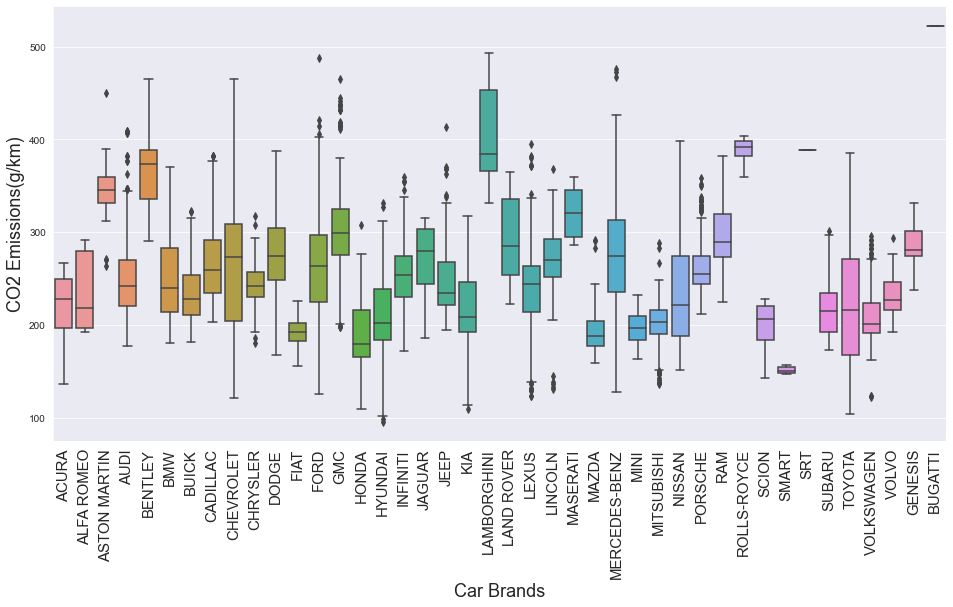

In [896]:
plt.subplots(figsize=(16, 8))
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Car Brands',fontsize=18)
plt.ylabel('CO2 Emissions(g/km)',fontsize=18);

Box plot for the distribution of CO2 Emissions based on the Car brands. Some car brands are showing variability in the CO2 distributions such as LEXUS, LINCOLN, MERCEDES-BENZ, VOLKSWAGEN AND AUDI. This could be due to the change in engine size and cylinders which could directly affect the fuel consumption in the car. 

In [897]:
#Grouping the data by vehicle class
grouped_df_class = df.groupby('Vehicle Class').agg({'CO2 Emissions(g/km)': ['mean', 'count']})
grouped_df_class.columns = ['CO2 Emissions(g/km)_mean', 'Number of Vehicles']
grouped_df_class=grouped_df_class.reset_index()
#grouped_df_class = grouped_df_class.drop(labels=369, axis=0)#deleting the lowercase repeated data for BUGATTI make
grouped_df_class=grouped_df_class.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False)
grouped_df_class.head(5)


,Vehicle Class,CO2 Emissions(g/km)_mean,Number of Vehicles
15,VAN - PASSENGER,397.212121,66
14,VAN - CARGO,361.500000,22
12,SUV - STANDARD,306.561017,590
6,PICKUP TRUCK - STANDARD,301.238298,470
13,TWO-SEATER,284.127841,352


From this table, Van-Passenger has the highest CO2 Emissions on average and it maybe due to large engine size(L) which means it might consume a lot of fuel which directly affects the CO2 Emissions.

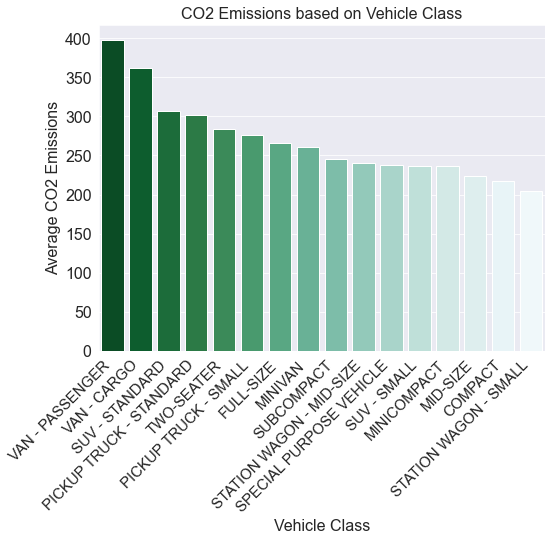

In [898]:
fig, c = plt.subplots(figsize = (8,6))
c = sns.barplot(x = 'Vehicle Class',y='CO2 Emissions(g/km)_mean',data=grouped_df_class,palette="BuGn_r")
c.set_xlabel('Vehicle Class', fontsize = 16)
c.set_ylabel ('Average CO2 Emissions', fontsize = 16)
c.set_title('CO2 Emissions based on Vehicle Class',fontsize=16)
plt.xticks(rotation=45,fontsize=15,ha='right')
plt.yticks(fontsize=16)
plt.show()

In [899]:
#grouping the data by Engine Size(L) and Cylinders
grouped_df_engine = df.groupby(['Engine Size(L)','Cylinders']).agg({'CO2 Emissions(g/km)': ['mean']})
grouped_df_engine.columns = ['CO2 Emissions(g/km)_mean']
grouped_df_engine=grouped_df_engine.reset_index()
grouped_df_engine.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Engine Size(L),Cylinders,CO2 Emissions(g/km)_mean
63,8.0,16,522.000000
62,6.8,10,488.000000
58,6.5,12,451.176471
53,6.0,8,428.517241
61,6.8,8,424.428571


From this table, the data is showing that larger Engine Size(L) and Cylinders lead to higher CO2 Emissions(g/km)

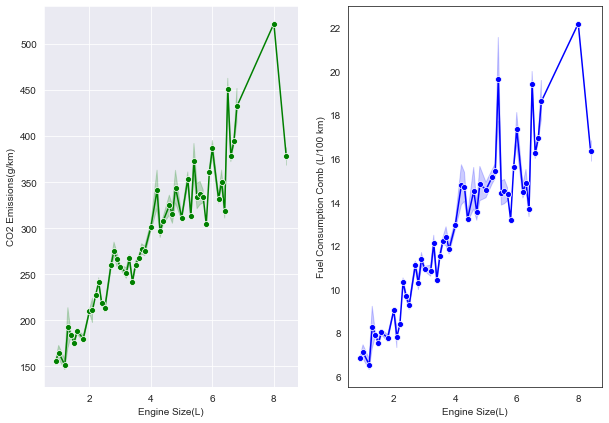

In [900]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')


From this graph, it can be seen that CO2 Emissions(g/km) and Fuel Consumption Comb are basically displaying the same result and show the same pattern for the same independent variable('Engine Size(L)') given.

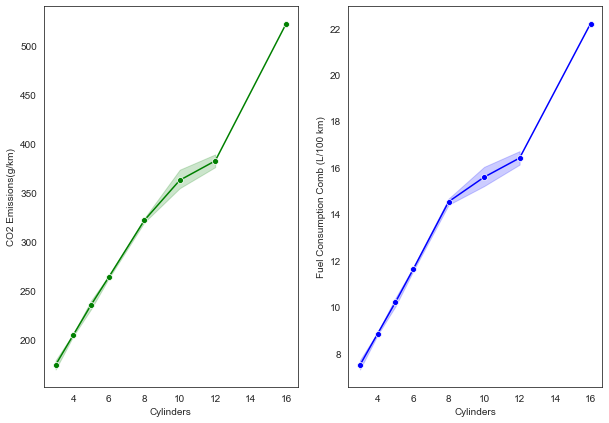

In [901]:
#Line graph for the same independent variable
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')

From this graph, it can be seen that CO2 Emissions(g/km) and Fuel Consumption Comb are basically displaying the same result and show the same pattern for the same independent variable('Cylinders') given. Although Cylinders is a discrete feature, in this case it used to see the pattern between the independent and dependent variable and confirm that Fuel Consumption Comb(L/100 km) is the same as CO2 Emissions(L/100km)

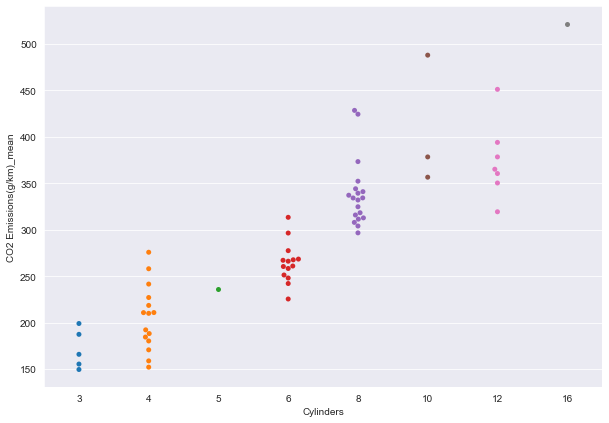

In [902]:
#swarmplot between cylinder and co2 emissions
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

_=sns.swarmplot(data=grouped_df_engine, x='Cylinders', y='CO2 Emissions(g/km)_mean')
plt.show()

In [903]:
#grouping just based on cylinders alone
grouped_df_cylinder = df.groupby(['Cylinders']).agg({'CO2 Emissions(g/km)': ['mean']})
grouped_df_cylinder.columns = ['CO2 Emissions(g/km)_mean']
grouped_df_cylinder=grouped_df_cylinder.reset_index()
grouped_df_cylinder.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Cylinders,CO2 Emissions(g/km)_mean
7,16,522.000000
6,12,382.290076
5,10,362.600000
4,8,321.711966
3,6,264.091662


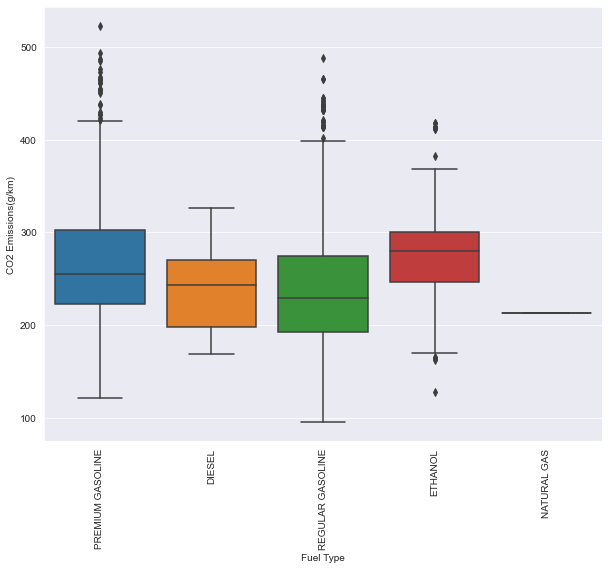

In [904]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel('Fuel Type',fontsize=10)
plt.ylabel('CO2 Emissions(g/km)',fontsize=10);

In [905]:
#grouping based on Fuel Type
grouped_df_fuel = df.groupby(['Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean','median']})
grouped_df_fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean','C02 Emissions Median']
grouped_df_fuel=grouped_df_fuel.reset_index().sort_values(by='C02 Emissions Median',ascending=False)
grouped_df_fuel.head(10)

,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean,C02 Emissions Median
1,ETHANOL,89798,325,276.301538,280.0
3,PREMIUM GASOLINE,702901,2641,266.149565,255.0
0,DIESEL,34402,146,235.630137,243.5
4,REGULAR GASOLINE,680250,2878,236.362057,229.0
2,NATURAL GAS,213,1,213.000000,213.0


Although research has proven that ethanol produces less carbon dioxide emissions in comparison to other fuel types, this data is showing differing results. This can be due to incorrect collection of data, or that only 325 data were collected for cars that use ethanol as a fuel type, in comparison to 1000+ for premium gasoline and regular gasoline which somehow skews the result in favor of gasoline fuel type emitting less carbon dioxide on average.

In [906]:
fuel_e=df.loc[df['Fuel Type'] == 'ETHANOL']
fuel_e.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
1534,GMC,SAVANA 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,Automatic,ETHANOL,30.6,20.6,26.1,418
1329,CHEVROLET,EXPRESS 3500 PASSENGER FFV,VAN - PASSENGER,6.0,8,A6,Automatic,ETHANOL,30.6,20.6,26.1,418


In [907]:
fuel_p=df.loc[df['Fuel Type'] == 'PREMIUM GASOLINE']
fuel_p.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,AM7,Automatic,PREMIUM GASOLINE,26.8,16.6,22.2,522
6046,LAMBORGHINI,AVENTADOR ROADSTER,TWO-SEATER,6.5,12,AM7,Automatic,PREMIUM GASOLINE,26.6,15.8,21.7,493


In [908]:
fuel_r=df.loc[df['Fuel Type'] == 'REGULAR GASOLINE']
fuel_r.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A5,Automatic,REGULAR GASOLINE,23.9,17.8,21.2,488
2663,GMC,SAVANA 3500 PASSENGER,VAN - PASSENGER,6.0,8,A6,Automatic,REGULAR GASOLINE,23.0,16.0,19.8,465


In [909]:
fig = px.histogram(df, 
                   x='Fuel Consumption Comb (L/100 km)', 
                   marginal='box', 
                   color='Fuel Type',  
                   title='Distribution')
fig.update_layout(bargap=0.1)
fig.show()

The energy content of ethanol is about 33% less than pure gasoline therefore more quantity(L) needs to be burned for ethanol to produce the same amount of energy as a pure form of gasoline. This graph is showing the distribution of different fuel types and their fuel consumption. Ethanol has higher fuel consumption on average in comparison to other fuel types 

In [910]:
fig = px.histogram(df, 
                   x='CO2 Emissions(g/km)', 
                   marginal='box', 
                   color='Fuel Type',  
                   title='Distribution')
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 720x504 with 0 Axes>

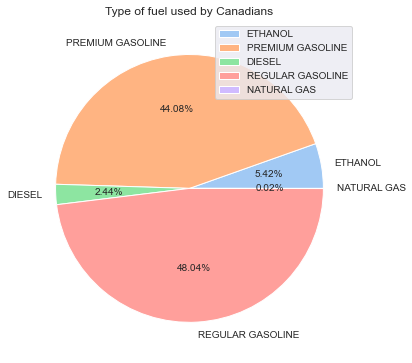

In [911]:
plt.figure(figsize=(10,7))
data = grouped_df_fuel.iloc[:,2]
labels = grouped_df_fuel.iloc[:,0]
plt.figure(figsize=(6,8))
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors, autopct='%0.2f%%')
plt.title('Type of fuel used by Canadians')
first_legend = plt.legend(labels,loc = 1)
plt.show();

From this pie chart, 48.04% of Canadians use Regular gasoline.

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

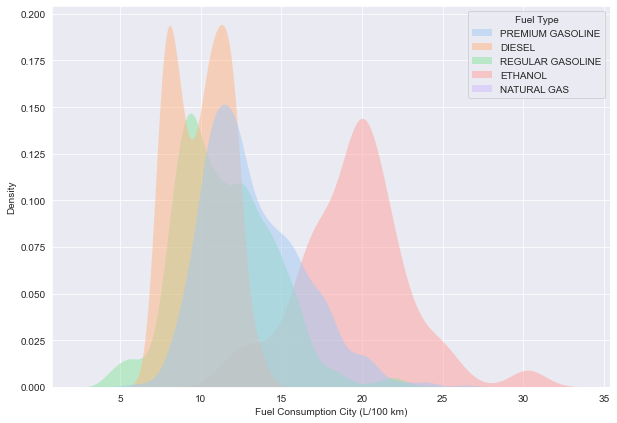

In [912]:
plt.figure(figsize=(10,7))
x=df.iloc[:,8]
sns.kdeplot(palette='pastel',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)



/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



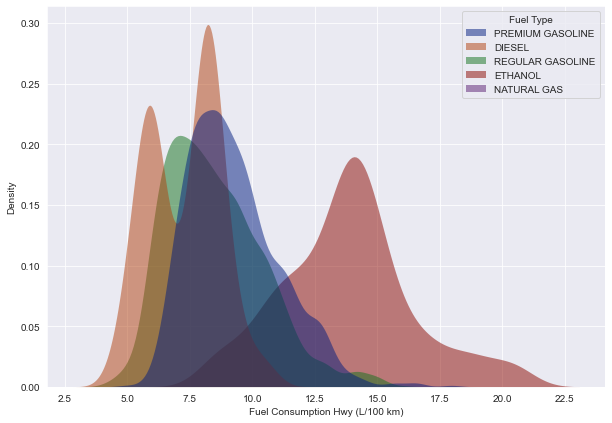

In [913]:
plt.figure(figsize=(10,7))
x=df.iloc[:,9]
g=sns.kdeplot(palette='dark',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.show(g)

From these kernel density plot, it can be seen that Fuel Consumption in Highway is less than Fuel Consumption in City for all types of fuels and this is due to less traffic and less vehicles on highway.

In [914]:
fig = px.scatter(df, x="Engine Size(L)", y="Fuel Consumption Comb (L/100 km)",
                 color="Fuel Type",
                 size='CO2 Emissions(g/km)')
  
fig.show()

Increase in Engine size, leads to increase in Fuel Consumption for every fuel type

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)'>

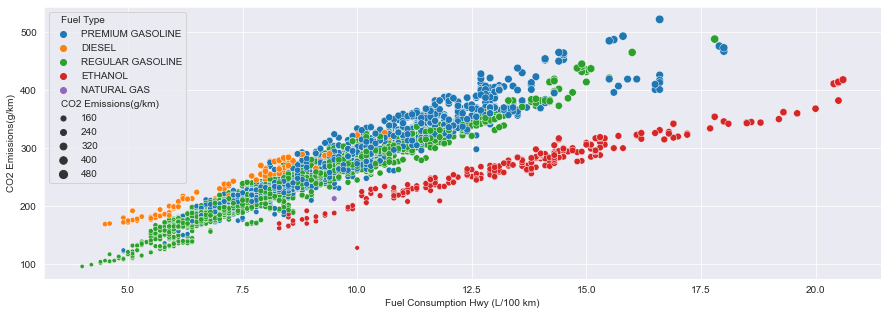

In [915]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption Hwy (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

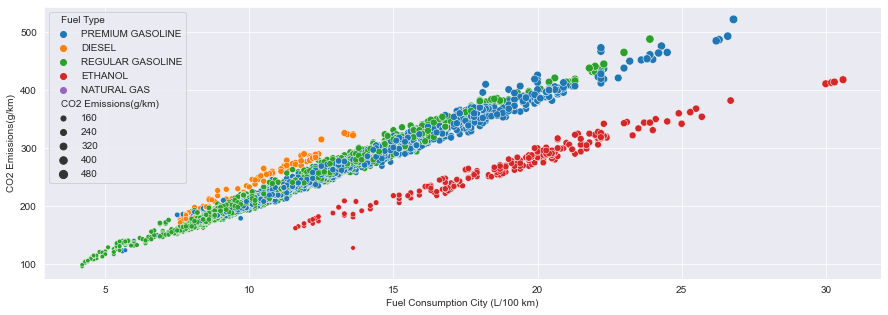

In [916]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption City (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

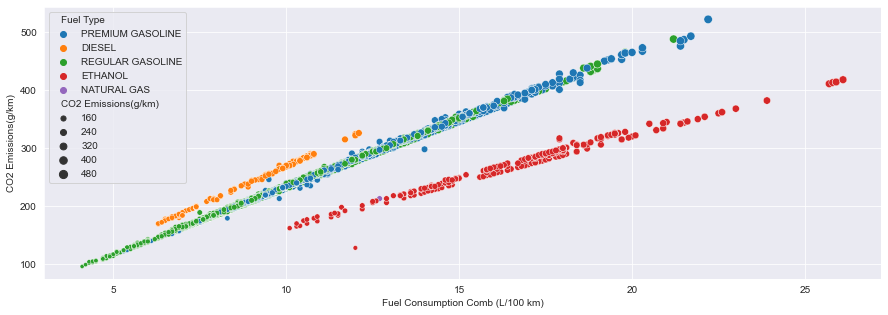

In [917]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

Ethanol has highest fuel consumption and less carbon dioxide emissions in comparison to other fuel types

In [918]:
#plt.figure(figsize=(10,7))
#_=sns.swarmplot(x='Fuel Type',y='C02 Emissions Median',data=grouped_df_Cylinders_Fuel,hue='Cylinders',size=6)
#plt.legend(loc='upper right')
#plt.show()

Premium Gasoline and Regular Gasoline have some outliers

<AxesSubplot:>

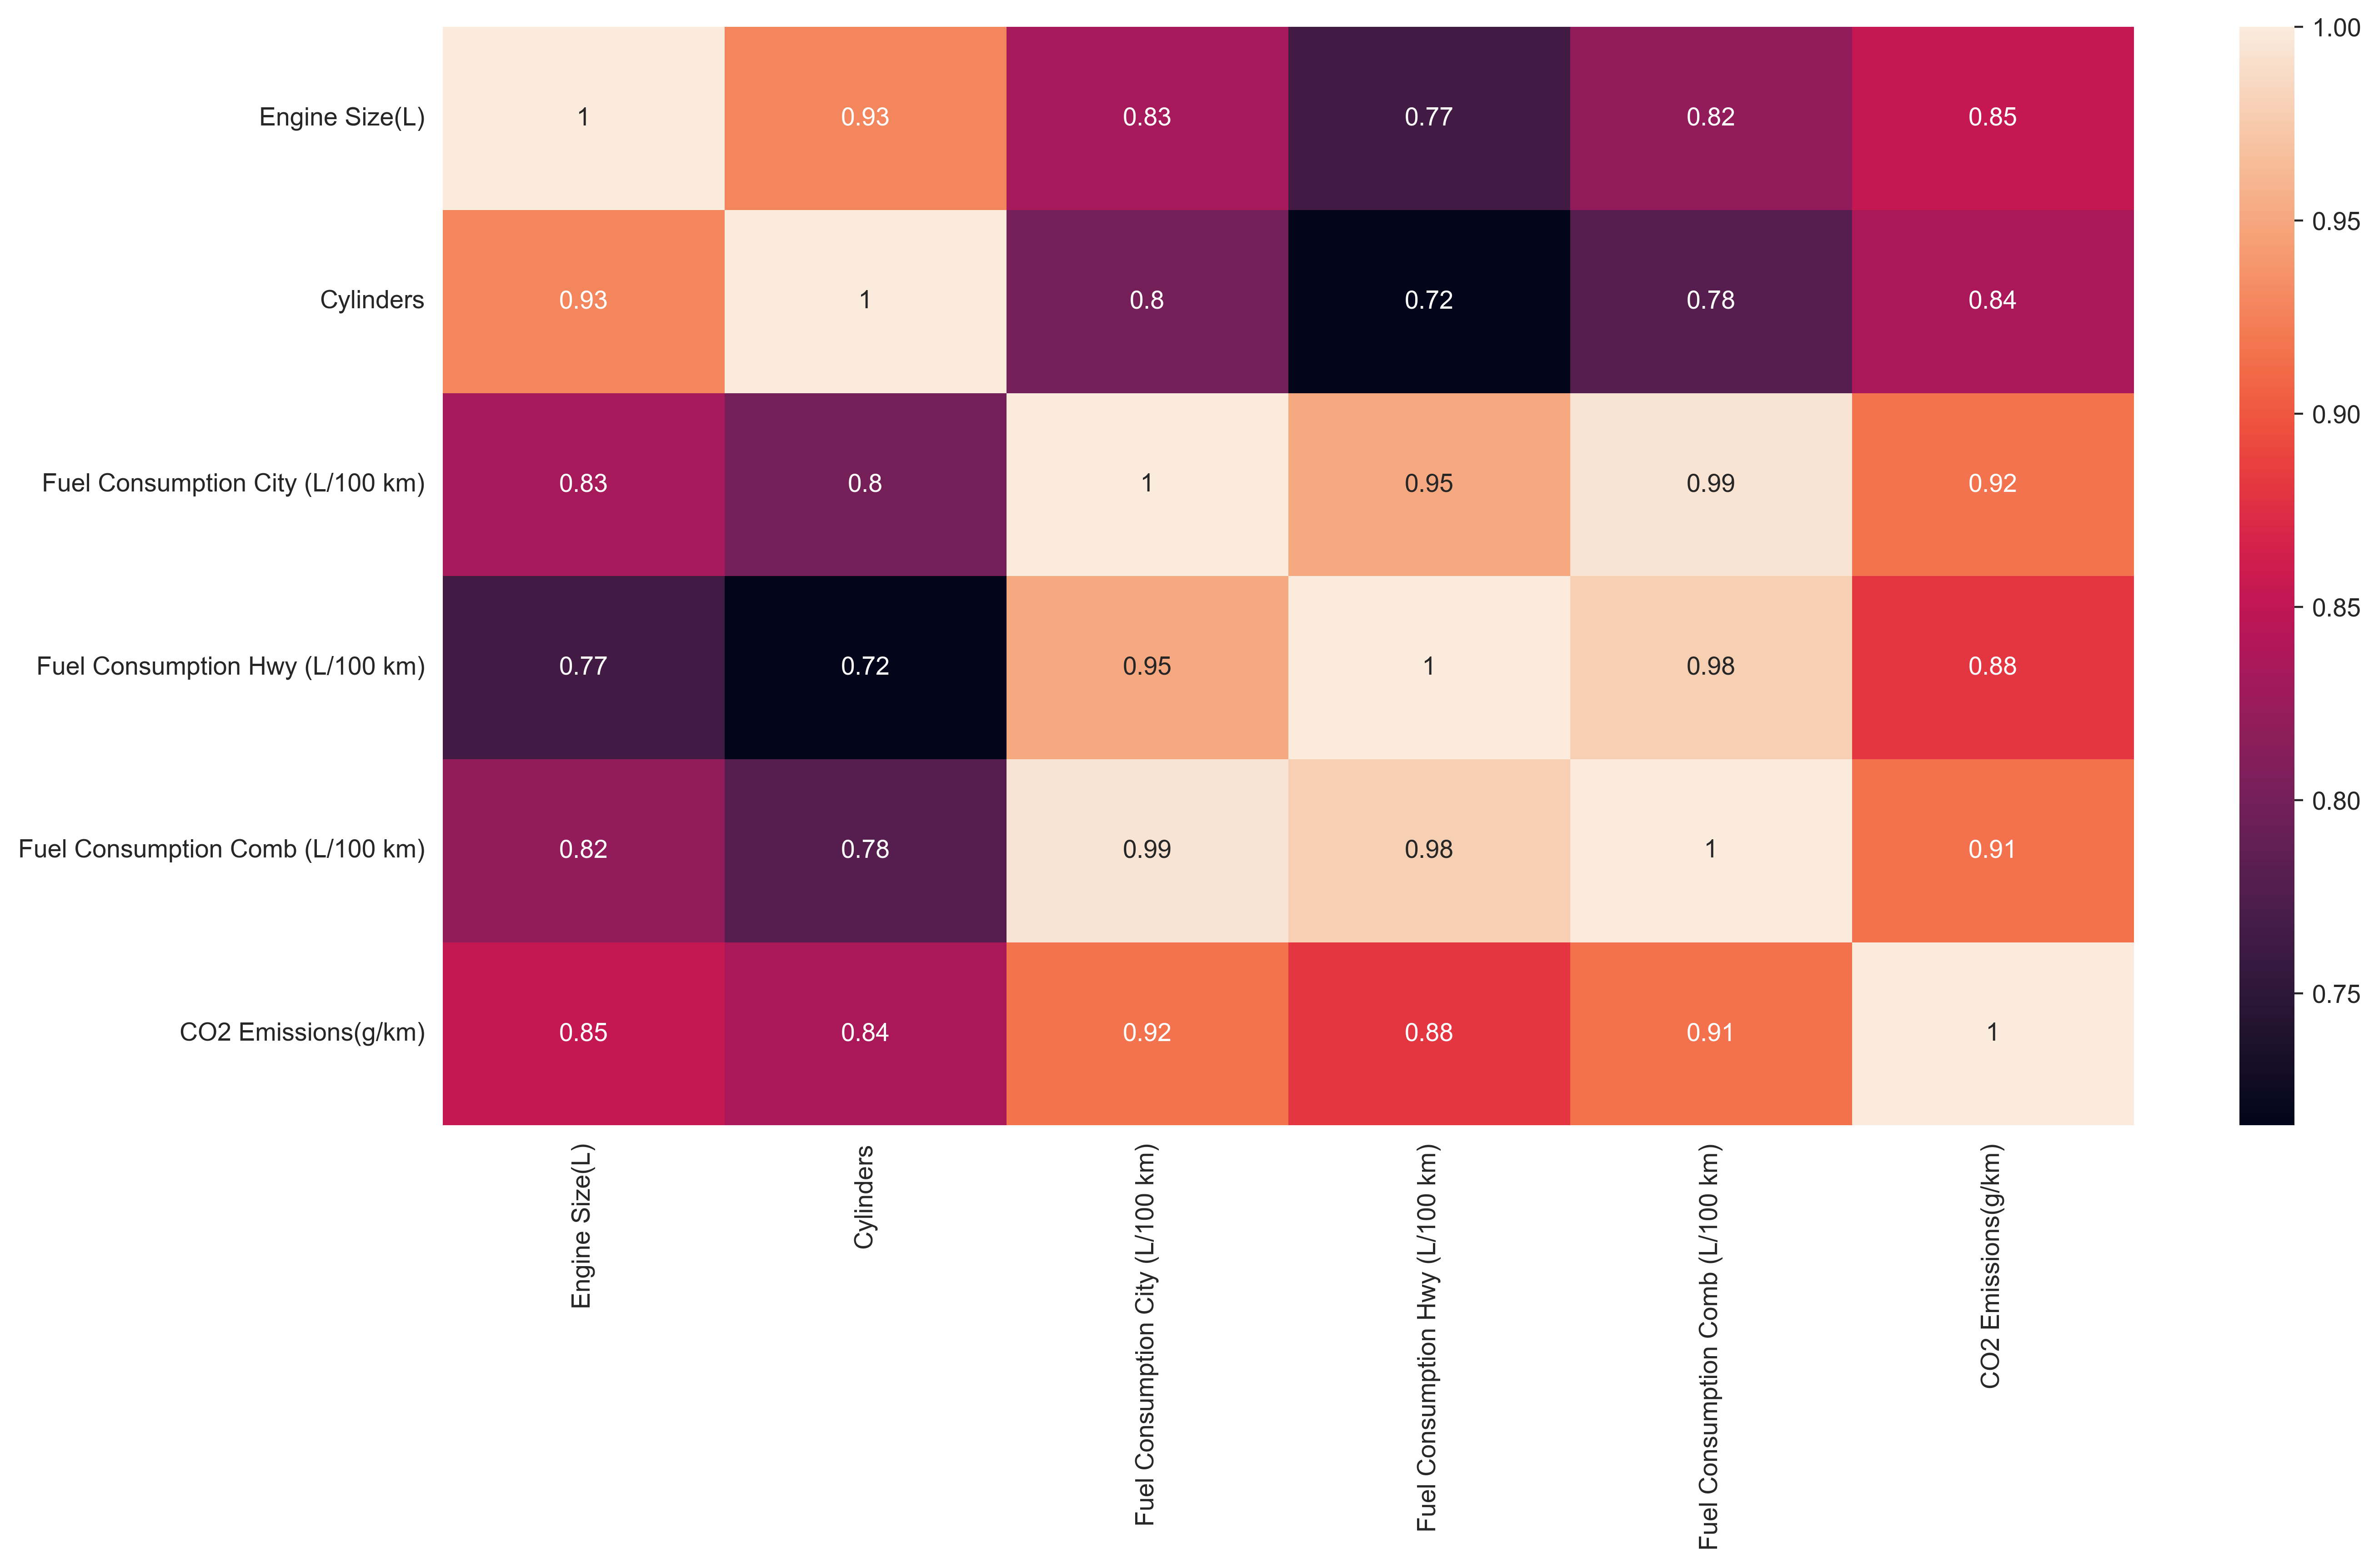

In [919]:
plt.figure(figsize = (15,8),dpi=400)
sns.heatmap(df.corr(), annot=True)

In [920]:
#converting the categorical data into dummy variables
df_dummy=pd.get_dummies(df, prefix='', prefix_sep='',columns=['Fuel Type','Transmission_Type'])

In [921]:
df_dummy.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),DIESEL,ETHANOL,NATURAL GAS,PREMIUM GASOLINE,REGULAR GASOLINE,Automatic,Manual
0,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,196,0,0,0,1,0,1,0


In [922]:
#df_dummy=pd.concat([df,df_dummy],axis=1)

In [923]:
#df_dummy.head(1)

In [924]:
#to avoid the duplication of data, dropping one unique column for each categorical feature.
df_dummy.drop(['REGULAR GASOLINE','Manual'],inplace=True,axis=1)

In [925]:
df_dummy.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),DIESEL,ETHANOL,NATURAL GAS,PREMIUM GASOLINE,Automatic
0,ACURA,ILX,COMPACT,2.0,4,AS5,9.9,6.7,8.5,196,0,0,0,1,1
1,ACURA,ILX,COMPACT,2.4,4,M6,11.2,7.7,9.6,221,0,0,0,1,0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,6.0,5.8,5.9,136,0,0,0,1,1
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,12.7,9.1,11.1,255,0,0,0,1,1
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,12.1,8.7,10.6,244,0,0,0,1,1


## Linear Regression Model

In [926]:
#defining the X and y variable
X = df_dummy[['DIESEL','ETHANOL','NATURAL GAS','PREMIUM GASOLINE','Engine Size(L)','Cylinders','Automatic']]
y = df_dummy["CO2 Emissions(g/km)"]

In [927]:
#splitting the X and y dataset
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [928]:
#to avoid bias in the data outcome, we are standardizing the data by scaling it
from sklearn.preprocessing import StandardScaler

In [929]:
scaler = StandardScaler()

In [930]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [931]:
reg_all=LinearRegression()
reg_all.fit(scaled_X_train,y_train)

LinearRegression()

In [932]:
print(X_train.shape, y_train.shape)
print(scaled_X_test.shape, y_test.shape)

(4193, 7) (4193,)
(1798, 7) (1798,)


In [933]:
y_pred=reg_all.predict(scaled_X_test)
y_pred

array([205.39409838, 262.1195004 , 215.92134634, ..., 301.81418803,
       354.45042784, 209.41787993])

In [934]:
print('Accuracy of linear regression on test set: {:.2f}'.format(reg_all.score(scaled_X_test, y_test)))

Accuracy of linear regression on test set: 0.75


In [935]:
#finding the residuals
test_res = y_test - y_pred
type(test_res)

pandas.core.series.Series

In [936]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [937]:
#Mean Squared Error, Root Mean Squared Error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [938]:
MAE,RMSE

(22.99259787072235, 30.178428293529244)

## Cross-validation:

In [939]:
#Cross-validation used to estimate the skill of a machine learning model on unseen data
#results in less-bias
from sklearn.model_selection import cross_val_score, KFold

In [940]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
reg=LinearRegression()

In [941]:
cv_results=cross_val_score(reg,X,y,cv=kf)
print(cv_results)

[0.75589225 0.72442665 0.74155752 0.74935762 0.7511444 ]


In [942]:
print(np.mean(cv_results),np.std(cv_results))

0.7444756873832603 0.011037414028931054


In [943]:
print(np.quantile(cv_results,[0.025,0.975]))

[0.72613974 0.75541747]


## Ridge Regression

In [944]:
from sklearn.linear_model import Ridge

In [945]:
#ridge regression model with hyperparameter tuning
ridge_model = Ridge(alpha=0.1)

In [946]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.1)

In [947]:
test_predictions = ridge_model.predict(X_test)

In [948]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [949]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [950]:
MAE,RMSE

(22.992510776338424, 30.17836228754734)

In [951]:
print('Accuracy of ridge regression on test set: {:.2f}'.format(ridge_model.score(X_test, y_test)))

Accuracy of ridge regression on test set: 0.75


In [952]:
### Choosing an alpha value with Cross-Validation

In [953]:
from sklearn.linear_model import RidgeCV

In [954]:
#penalty strength parameter as alpha
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0,20.0),scoring='neg_mean_absolute_error')

In [955]:
#k-fold cross validation fit to the training dataset
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. , 20. ]),
        scoring='neg_mean_absolute_error')

In [956]:
#optimal alpha
ridge_cv_model.alpha_

10.0

In [957]:
test_predictions = ridge_cv_model.predict(X_test)

In [958]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [959]:
MAE,RMSE

(22.98529428849865, 30.173288337874546)

In [960]:
ridge_cv_model.coef_

array([ 9.41002256, -7.04529021,  0.        ,  3.93739401, 26.06805448,
        8.78259913,  0.17411884])

In [961]:
print('Accuracy of ridge regression on test set: {:.2f}'.format(ridge_cv_model.score(X_test, y_test)))

Accuracy of ridge regression on test set: 0.75




## Lasso Regression

In [962]:
from sklearn.linear_model import LassoCV

In [963]:
lasso_cv_model = LassoCV(eps=0.1,n_alphas=10,cv=5)

In [964]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1, n_alphas=10)

In [965]:
lasso_cv_model.alpha_

8.969859393948726

In [966]:
test_predictions = lasso_cv_model.predict(X_test)

In [967]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [968]:
MAE,RMSE

(23.302243923594848, 31.30641740608961)

In [969]:
lasso_cv_model.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , 13.38574599,
       14.87839714,  0.        ])

In [970]:
print('Accuracy of lasso regression on test set: {:.2f}'.format(lasso_cv_model.score(X_test, y_test)))

Accuracy of lasso regression on test set: 0.73


## Elastic Net Regression

In [971]:
from sklearn.linear_model import ElasticNetCV

In [972]:
#improve the regularization by combining lasso and ridge regression
#minimize the RSS(residual sum of squares) and the absolute and squared value terms(absolute for lasso and square for ridge)
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [973]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [974]:
elastic_model.l1_ratio_

1.0

In [975]:
test_predictions = elastic_model.predict(X_test)

In [976]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [977]:
MAE,RMSE

(22.976596119057856, 30.16707494117302)

In [978]:
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

22.7934041861518

In [979]:
elastic_model.coef_

array([ 6.56075569, -5.98954917,  0.        ,  3.80760836, 26.80905803,
        8.24491728,  0.        ])

In [980]:
print('Accuracy of elestic regression on test set: {:.2f}'.format(elastic_model.score(X_test, y_test)))

Accuracy of elestic regression on test set: 0.75


## KNN Regression

In [981]:
from sklearn.neighbors import KNeighborsRegressor

Text(0.5, 1.0, 'ELBOW PLOT')

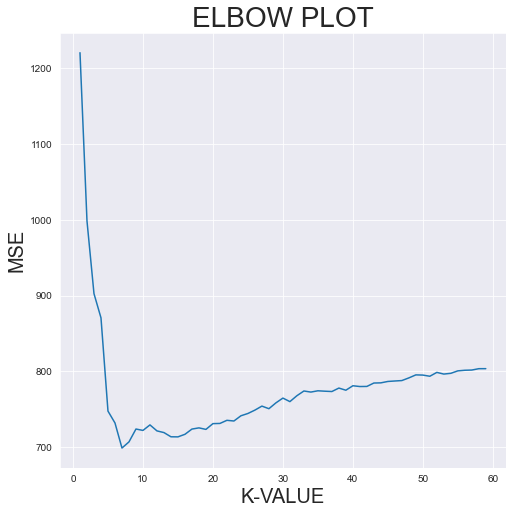

In [982]:
#Elbow plot to determine the optimal value of K that yields lowest MSE
fig,ax=plt.subplots(figsize=(8,8))
k_list=np.arange(1,60,1)
knn_dict={} # To store k and mse pairs
for i in k_list:
#Knn Model Creation
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(X_train,y_train)
    y_knn_pred=model_knn.predict(X_test)
#Storing MSE 
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse
#Plotting the results
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

In [983]:
knn=KNeighborsRegressor(n_neighbors=7)

In [984]:
model_knn=knn.fit(X_train,y_train)
test_predictions=model_knn.predict(X_test)

In [985]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [986]:
MAE,RMSE

(19.53448275862069, 26.436245294391956)

In [987]:
print('Accuracy of knn regressor on test set: {:.2f}'.format(model_knn.score(X_test, y_test)))

Accuracy of knn regressor on test set: 0.81


## Support Vector Regression

In [1085]:
#create a hypothetical hyperplane that maximizes the margin
#choose linear kernel
from sklearn.svm import SVR

In [1086]:
base_model = SVR()

In [1087]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [1088]:
base_preds = base_model.predict(scaled_X_test)

In [1089]:
mean_absolute_error(y_test,base_preds)

23.42771761198186

In [1090]:
np.sqrt(mean_squared_error(y_test,base_preds))

32.10741245024187

In [1100]:
param_grid = {'C':[10, 100,200],
             'kernel':['linear'],
              'degree':[2,3,4],
              'gamma':[1,0.1,0.01],
              'epsilon':[0.1,0.5,1]}

In [1101]:
from sklearn.model_selection import GridSearchCV

In [1102]:
svr = SVR()
grid_model = GridSearchCV(estimator=svr,param_grid=param_grid,scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)

In [1103]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END C=10, degree=2, epsilon=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=2, epsilon=0

[CV] END C=10, degree=4, epsilon=0.1, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.1, gamma=0.01, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=1, kernel=linear; total time=   0.5s
[CV] END C=10, degree=4, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.5s
[CV] END 

[CV] END C=100, degree=3, epsilon=0.5, gamma=1, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=1, kernel=linear; total time=   0.6s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.6s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.1, kernel=linear; total time=   0.6s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.6s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.7s
[CV] END C=100, degree=3, epsilon=0.5, gamma=0.01, kernel=linear; total time

[CV] END C=200, degree=2, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END C=200, degree=2, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END C=200, degree=2, epsilon=0.5, gamma=0.01, kernel=linear; total time=   0.8s
[CV] END .C=200, degree=2, epsilon=1, gamma=1, kernel=linear; total time=   1.0s
[CV] END .C=200, degree=2, epsilon=1, gamma=1, kernel=linear; total time=   0.9s
[CV] END .C=200, degree=2, epsilon=1, gamma=1, kernel=linear; total time=   1.2s
[CV] END .C=200, degree=2, epsilon=1, gamma=1, kernel=linear; total time=   1.0s
[CV] END .C=200, degree=2, epsilon=1, gamma=1, kernel=linear; total time=   0.9s
[CV] END C=200, degree=2, epsilon=1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END C=200, degree=2, epsilon=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END C=200, degree=2, epsilon=1, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END C=200, degree=2, epsilon=1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END C=2

[CV] END C=200, degree=4, epsilon=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END C=200, degree=4, epsilon=1, gamma=0.1, kernel=linear; total time=   1.2s
[CV] END C=200, degree=4, epsilon=1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END C=200, degree=4, epsilon=1, gamma=0.1, kernel=linear; total time=   0.9s
[CV] END C=200, degree=4, epsilon=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END C=200, degree=4, epsilon=1, gamma=0.01, kernel=linear; total time=   0.9s
[CV] END C=200, degree=4, epsilon=1, gamma=0.01, kernel=linear; total time=   1.2s
[CV] END C=200, degree=4, epsilon=1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END C=200, degree=4, epsilon=1, gamma=0.01, kernel=linear; total time=   0.9s


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [10, 100, 200], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.5, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=2)

In [1016]:
grid_model.best_estimator_

SVR(C=100, epsilon=0.5, gamma=1, kernel='linear')

In [1017]:
svm=SVR(C=100,degree=2,epsilon=0.5,kernel='linear')
svm_model=svm.fit(scaled_X_train,y_train)
result=svm.predict(scaled_X_test)

In [1018]:
print('Accuracy of SVM regression on test set: {:.2f}'.format(svm_model.score(scaled_X_test, y_test)))

Accuracy of SVM regression on test set: 0.75


In [1019]:
MAE = mean_absolute_error(y_test,result)
MSE = mean_squared_error(y_test,result)
RMSE = np.sqrt(MSE)

In [1020]:
MAE,RMSE

(22.670419890094117, 30.218486080237692)

## Regression Tree

In [1021]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)

In [1022]:
model=regressor.fit(X_train,y_train)

In [1023]:
model.score(X_test, y_test)

0.8293812478108182

In [1024]:
y_test_pred = model.predict(X_test)

In [1025]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

18.49124792728084

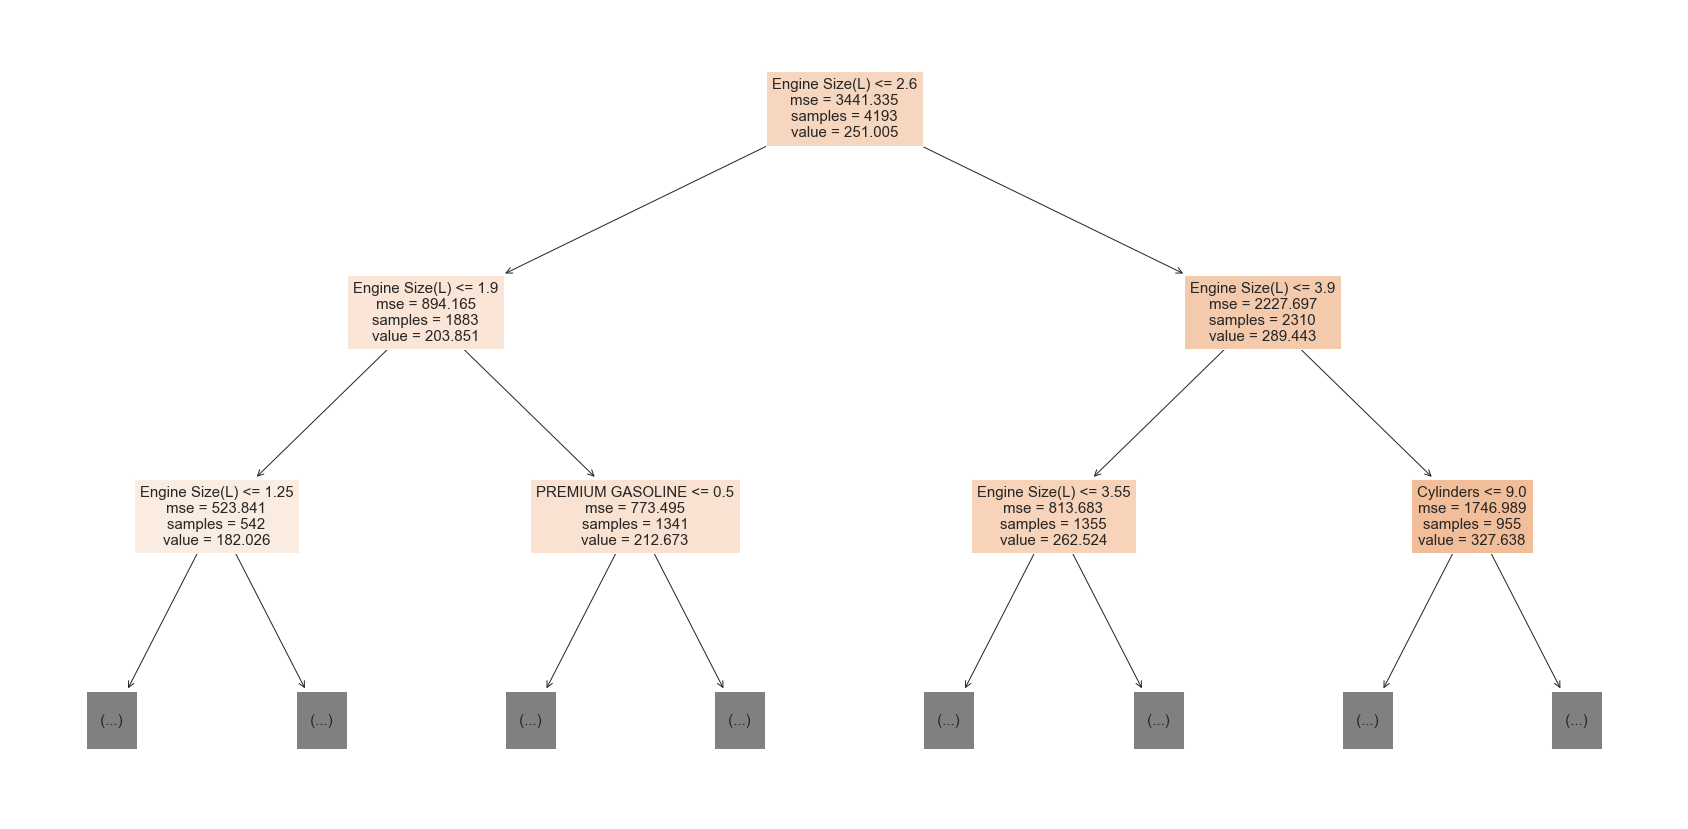

In [1050]:
plt.figure(figsize = (30,15))
from sklearn import tree
tree.plot_tree(model, 
               feature_names = list(X_train.columns), 
               filled = True,
               max_depth = 2);

In [1027]:
importance = model.feature_importances_
importance

array([4.36439393e-04, 3.22768412e-03, 0.00000000e+00, 1.61663767e-02,
       9.35024844e-01, 3.72502044e-02, 7.89445160e-03])

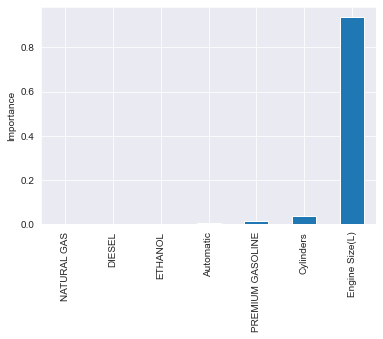

In [1028]:
feature_importance = pd.Series(importance, index = X_train.columns)
feature_importance.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

The most important feature is Engine Size(L) for this model.

In [1029]:
model.score(X_train, y_train)

0.8220720697447578

In [1030]:
model.score(X_test, y_test)

0.8293812478108182



No pruning required as the model score for the train and testing set is same. This means there is no overfitting or underfitting of the data on the decision tree regression model.




In [1039]:
tree_param = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [1040]:
grid_model = GridSearchCV(estimator=regressor,param_grid=tree_param,scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=2)


In [1041]:
model=grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=6; total time=   0.0s
[CV] END .......................................

In [1042]:
y_test_pred = grid_model.predict(X_test)

In [1043]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=12, random_state=42)

In [1044]:
regressor = DecisionTreeRegressor(random_state = 42,max_depth=12)

In [1046]:
model2=regressor.fit(X_train,y_train)

In [1047]:
model2pred=model2.predict(X_test)

In [1048]:
model2.score(X_test, y_test)

0.8293812478108182

In [1051]:
mean_absolute_error(y_test, y_test_pred)

18.49124792728084

## GRADIENT BOOSTING

In [1052]:
from sklearn.ensemble import GradientBoostingRegressor

In [1053]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss 

In [1054]:
from sklearn.model_selection import GridSearchCV

In [1055]:
param_grid = {"n_estimators":[1,5,10,20,40,100,200,300],'max_depth':[3,4,5,6,8]}

In [1056]:
gb_model = GradientBoostingRegressor()

In [1057]:
grid_gb_model = GridSearchCV(gb_model,param_grid)

In [1058]:
grid_gb_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [1, 5, 10, 20, 40, 100, 200, 300]})

In [1059]:
grid_gb_model.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [1060]:
predictions = grid.predict(X_test)

In [1061]:
predictions

array([202.84107158, 269.90282763, 218.52545466, ..., 316.39325077,
       333.17512656, 217.91858161])

In [1062]:
grid_gb_model.best_estimator_.feature_importances_

array([2.71787399e-04, 2.86365186e-03, 0.00000000e+00, 1.56170643e-02,
       9.36974749e-01, 3.72109992e-02, 7.06174787e-03])

In [1063]:
feat_import = grid_gb_model.best_estimator_.feature_importances_

In [1064]:
imp_feats.sort_values(by='Importance')

,Importance
NATURAL GAS,0.000000
DIESEL,0.000271
ETHANOL,0.002864
Automatic,0.007061
PREMIUM GASOLINE,0.015621
Cylinders,0.037305
Engine Size(L),0.936879


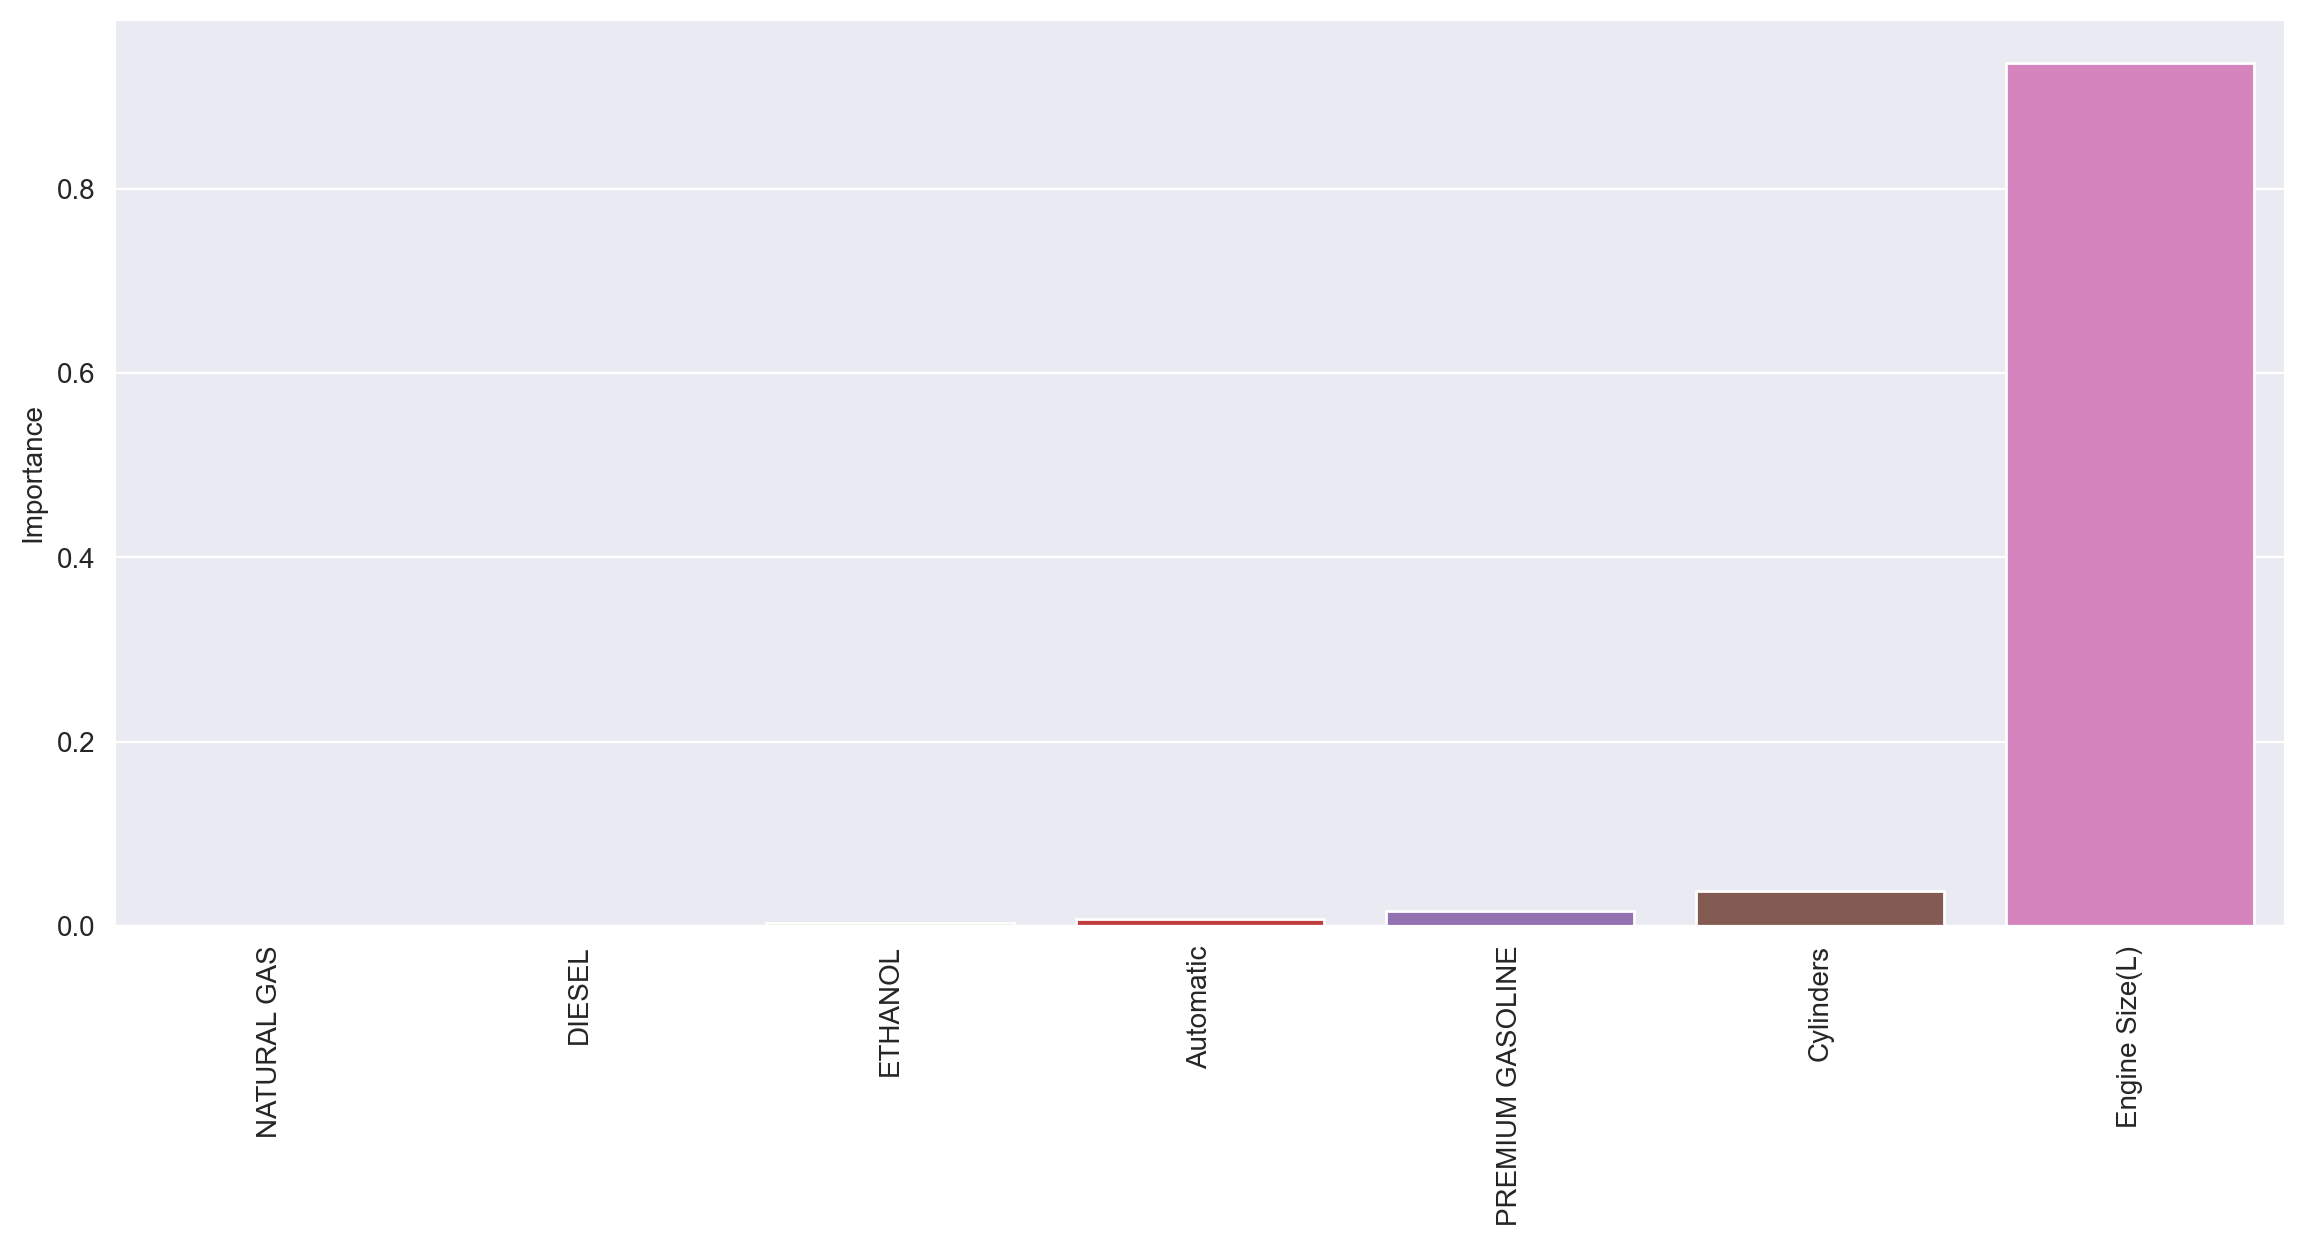

In [1065]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values(by='Importance'),x=imp_feats.sort_values(by='Importance').index,y='Importance')

plt.xticks(rotation=90);

In [1066]:
grid_gb_model.score(X_test, y_test)

0.8284429358973381

In [1067]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [1068]:
gb_model.score(X_test, y_test)

0.8109837997002249

In [1069]:
print('Accuracy of GB cross validation regression on test set: {:.2f}'.format(grid_gb_model.score(X_test, y_test)))

Accuracy of GB cross validation regression on test set: 0.83




## Random Forest Regression

In [1070]:
from sklearn.ensemble import RandomForestRegressor

In [1071]:
rfr_model = RandomForestRegressor().fit(X_train, y_train)

In [1072]:
y_pred = rfr_model.predict(X_test)

In [1073]:
print('Accuracy of RF regression on test set: {:.2f}'.format(rfr_model.score(X_test, y_test)))

Accuracy of RF regression on test set: 0.83


In [1074]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [1075]:
MAE,RMSE

(18.586063082911338, 25.098051663768043)

## Random Search with Cross Validation

In [1076]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [1077]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [1078]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

In [1079]:
y_pred = rf_random.predict(X_test)

In [1080]:
print('Accuracy of RF cross validation regression on test set: {:.2f}'.format(rf_random.score(X_test, y_test)))

Accuracy of RF cross validation regression on test set: 0.83


From all these models, random forest regression, gradient boosting and regression tree produced the best score of 0.83 which shows that these models are best for predicting the carbon dioxide emissions from vehicles.